ЛАБОРАТОРНАЯ РАБОТА №9. ПОНИЖЕНИЕ РАЗМЕРНОСТИ. ОТ-БОР ПРИЗНАКОВ. ИЗВЛЕЧЕНИЕ ПРИЗНАКОВ

ЗАДАНИЕ №1.
1. Для выполнения задания №1 используйте датасеты для задачи классификации и регрессии.
2. С помощью классов библиотеки sklearn выполните понижение размерности (размерность выберите сами, можно разные) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).
3. Выберите две модели (одна - для регрессии и другая - для классификации). Обучите выбранные модели с использованием данных в пространстве низкой размерности - используйте результаты выполнения пункта 3 (не забудьте, что понижать нужно и X_train и X_test, но проще всего понижать X).
4. Сформулируйте вывод о том, какие методы понижения размерности лучше всего подходят для Ваших данных.


ЗАДАНИЕ №2**.
1. Самостоятельно реализуйте алгоритм PCA. На основе датасета для задачи классификации выполните понижение размерности до 2 (преобразуйте данные в двумерное пространство). Выполните визуализацию данных (точки на плоскости).
2. Выполнить кластеризацию преобразованных в пункте 1 данных с помощью Вашей реализации алгоритма KMeans из ЛР6.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras import layers
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.manifold import TSNE, Isomap
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
classification_data = pd.read_csv('csgo.csv')
classification_data = classification_data.drop('Unnamed: 0', axis=1)
regression_data = pd.read_csv('wines.csv')
regression_data = regression_data.drop('Unnamed: 0', axis=1)

In [3]:
classification_data.head(5)

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive,bomb_planted_True
0,29.27,2.0,1.0,379.0,99.0,487.0,93.0,2050.0,100.0,0.0,1.0,0.0,5.0,1.0,1
1,22.70,3.0,1.0,100.0,149.0,100.0,175.0,1050.0,1250.0,1.0,2.0,1.0,1.0,2.0,1
2,37.38,3.0,2.0,300.0,414.0,300.0,441.0,250.0,6300.0,1.0,5.0,0.0,3.0,5.0,1
3,17.38,3.0,2.0,300.0,414.0,300.0,441.0,250.0,6300.0,1.0,5.0,0.0,3.0,5.0,1
4,24.84,3.0,3.0,67.0,0.0,96.0,0.0,2150.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [4]:
regression_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
2,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
3,6.2,0.32,0.16,7.0,0.045,30.0,0.9949,3.18,0.47,9.6,6
4,8.1,0.22,0.43,1.5,0.044,28.0,0.9938,3.22,0.45,11.0,6


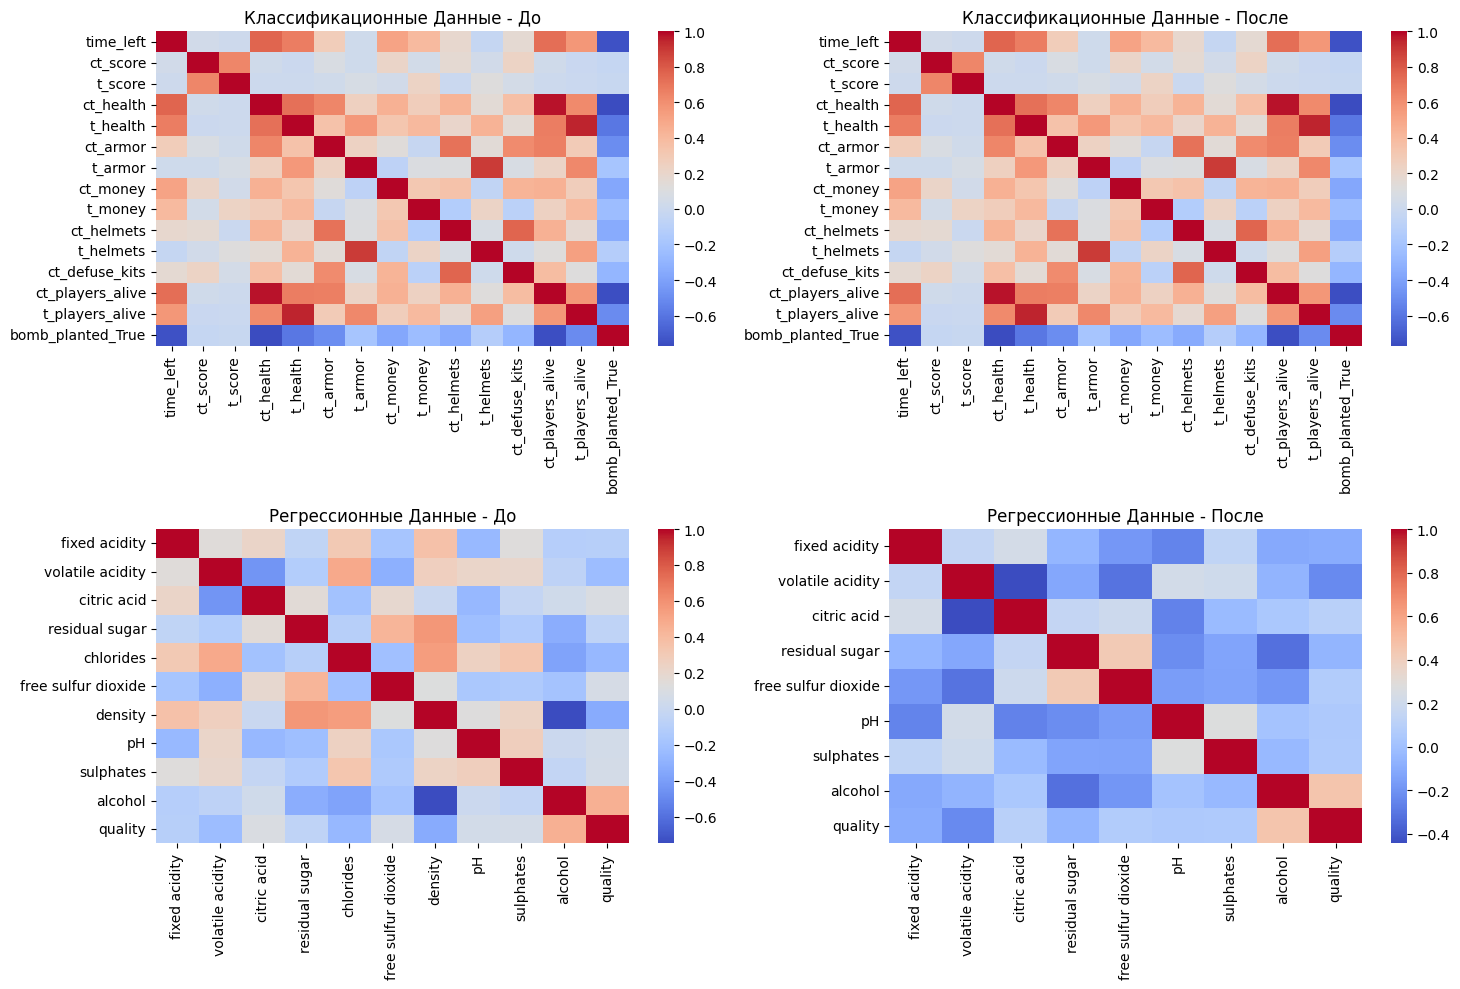

In [5]:
threshold = 0.01  # Можно настроить порог
selector_classification = VarianceThreshold(threshold)
classification_data_reduced = selector_classification.fit_transform(classification_data)
classification_columns_reduced = classification_data.columns[selector_classification.get_support()]

selector_regression = VarianceThreshold(threshold)
regression_data_reduced = selector_regression.fit_transform(regression_data)
regression_columns_reduced = regression_data.columns[selector_regression.get_support()]

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Классификационные данные - до и после
sns.heatmap(classification_data.corr(), ax=axes[0, 0], cmap="coolwarm").set_title("Классификационные Данные - До")
sns.heatmap(pd.DataFrame(classification_data_reduced, columns=classification_columns_reduced).corr(), 
            ax=axes[0, 1], cmap="coolwarm").set_title("Классификационные Данные - После")

# Регрессионные данные - до и после
sns.heatmap(regression_data.corr(), ax=axes[1, 0], cmap="coolwarm").set_title("Регрессионные Данные - До")
sns.heatmap(pd.DataFrame(regression_data_reduced, columns=regression_columns_reduced).corr(), 
            ax=axes[1, 1], cmap="coolwarm").set_title("Регрессионные Данные - После")

plt.tight_layout()
plt.show()

SelectKBest

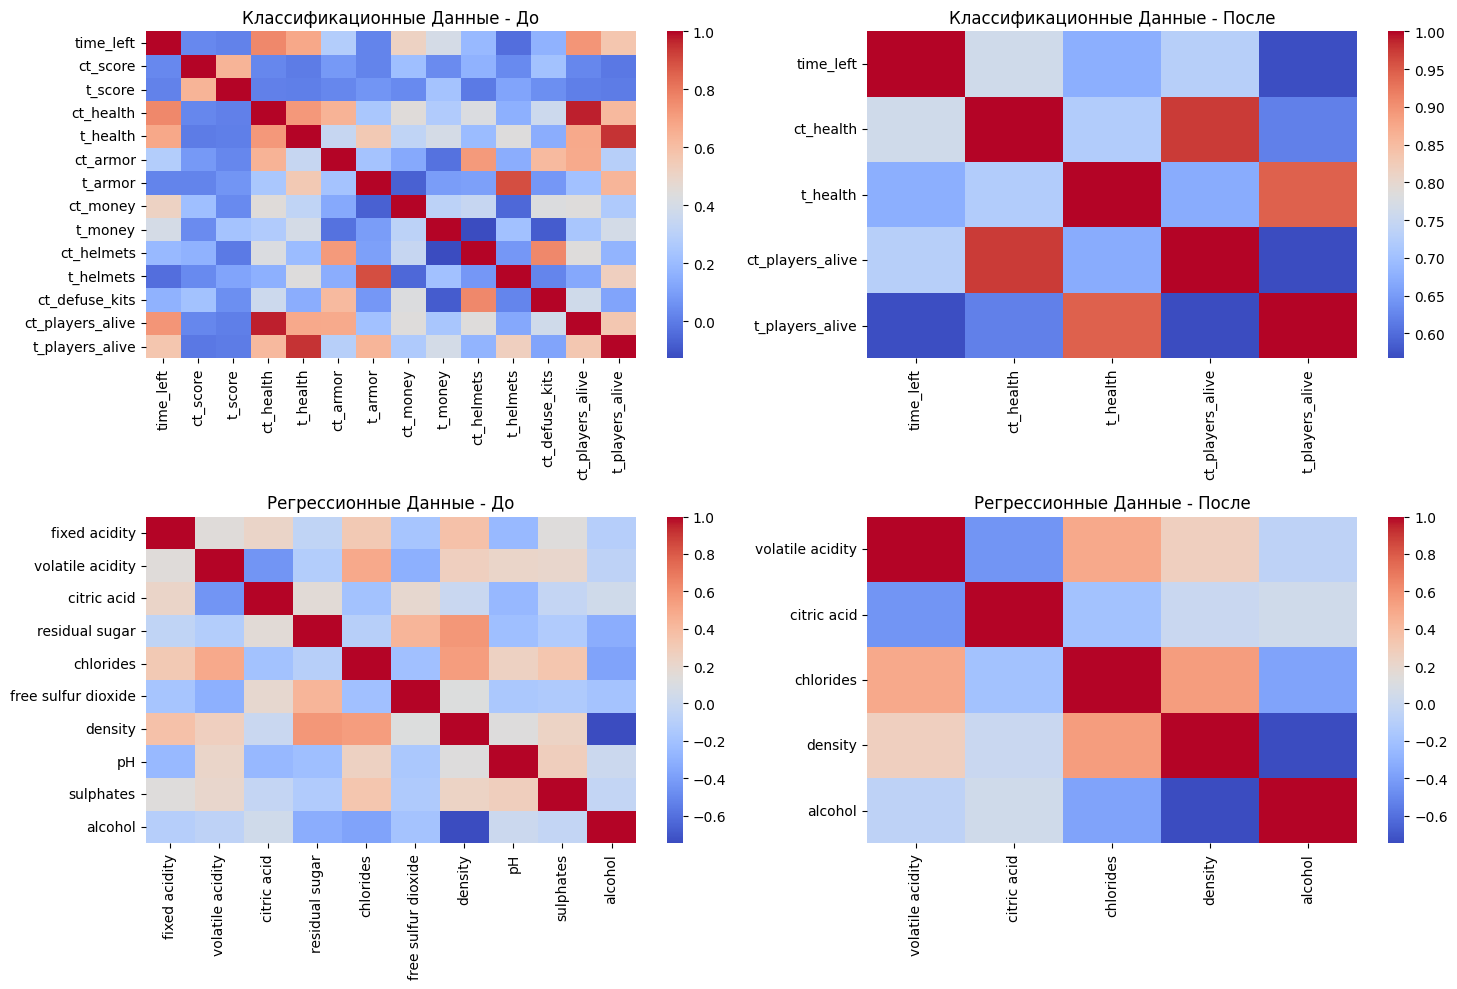

In [6]:
k = 5

# SelectKBest для классификационных данных
selector_classification = SelectKBest(f_classif, k=k)
X_classification = classification_data.drop('bomb_planted_True', axis=1)
y_classification = classification_data['bomb_planted_True']
classification_data_reduced = selector_classification.fit_transform(X_classification, y_classification)
classification_columns_reduced = X_classification.columns[selector_classification.get_support()]

# SelectKBest для регрессионных данных
selector_regression = SelectKBest(mutual_info_regression, k=k)
X_regression = regression_data.drop('quality', axis=1)
y_regression = regression_data['quality']
regression_data_reduced = selector_regression.fit_transform(X_regression, y_regression)
regression_columns_reduced = X_regression.columns[selector_regression.get_support()]

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Классификационные данные - до и после
sns.heatmap(X_classification.corr(), ax=axes[0, 0], cmap="coolwarm").set_title("Классификационные Данные - До")
sns.heatmap(pd.DataFrame(classification_data_reduced, columns=classification_columns_reduced).corr(), 
            ax=axes[0, 1], cmap="coolwarm").set_title("Классификационные Данные - После")

# Регрессионные данные - до и после
sns.heatmap(X_regression.corr(), ax=axes[1, 0], cmap="coolwarm").set_title("Регрессионные Данные - До")
sns.heatmap(pd.DataFrame(regression_data_reduced, columns=regression_columns_reduced).corr(), 
            ax=axes[1, 1], cmap="coolwarm").set_title("Регрессионные Данные - После")

plt.tight_layout()
plt.show()

RFE

c:\Users\бумбурурик)\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\бумбурурик)\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

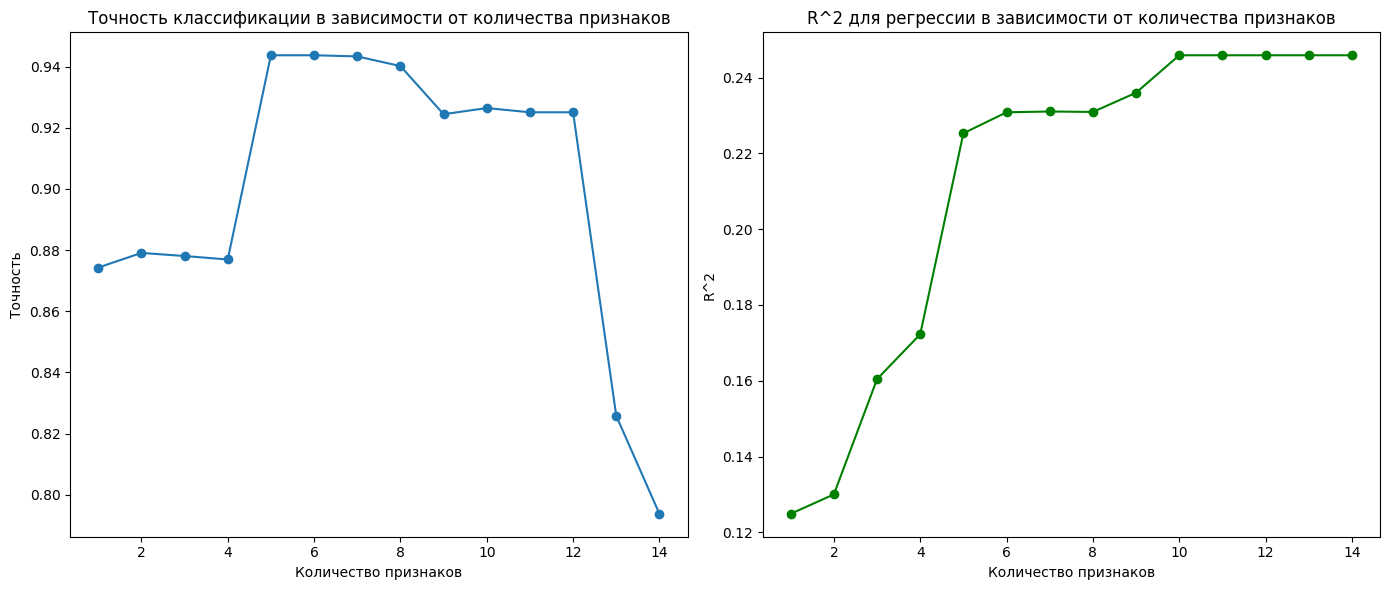

In [7]:
X_classification = classification_data.drop('bomb_planted_True', axis=1)
y_classification = classification_data['bomb_planted_True']

X_regression = regression_data.drop('quality', axis=1)
y_regression = regression_data['quality']

# Деление данных на обучающую и тестовую выборки
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

# Инициализация моделей
model_clf = LogisticRegression()
model_reg = LinearRegression()

# Инициализация списков для сохранения результатов
accuracy_scores = []
r2_scores = []
n_features = range(1, X_train_clf.shape[1] + 1)

# Перебор различного количества признаков
for n in n_features:
    # Классификация
    rfe_clf = RFE(estimator=model_clf, n_features_to_select=n)
    rfe_clf.fit(X_train_clf, y_train_clf)
    y_pred_clf = rfe_clf.predict(X_test_clf)
    accuracy_scores.append(accuracy_score(y_test_clf, y_pred_clf))

    # Регрессия
    rfe_reg = RFE(estimator=model_reg, n_features_to_select=n)
    rfe_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = rfe_reg.predict(X_test_reg)
    r2_scores.append(r2_score(y_test_reg, y_pred_reg))

# Визуализация результатов
plt.figure(figsize=(14, 6))

# График для классификации
plt.subplot(1, 2, 1)
plt.plot(n_features, accuracy_scores, marker='o')
plt.title('Точность классификации в зависимости от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('Точность')

# График для регрессии
plt.subplot(1, 2, 2)
plt.plot(n_features, r2_scores, marker='o', color='green')
plt.title('R^2 для регрессии в зависимости от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()

PCA

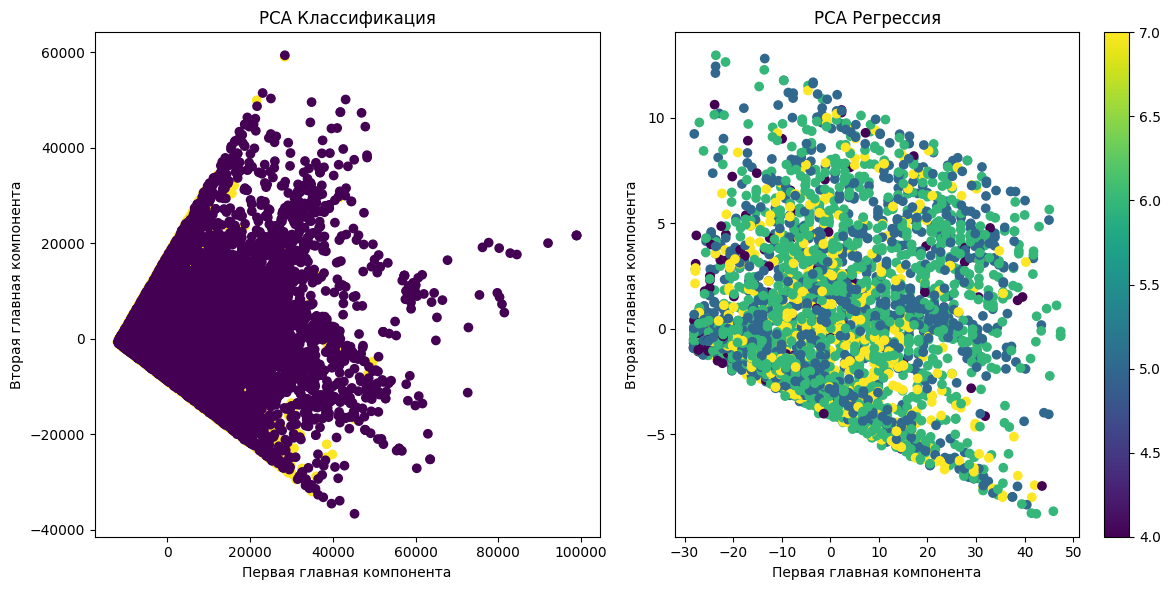

In [8]:
pca_clf = PCA(n_components=2)
pca_reg = PCA(n_components=2)

# Классификация
X_pca_clf = pca_clf.fit_transform(X_classification)

# Регрессия
X_pca_reg = pca_reg.fit_transform(X_regression)

# Визуализация результатов PCA
plt.figure(figsize=(12, 6))

# График для классификации
plt.subplot(1, 2, 1)
plt.scatter(X_pca_clf[:, 0], X_pca_clf[:, 1], c=y_classification, cmap='viridis')
plt.title('PCA Классификация')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')

# График для регрессии
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca_reg[:, 0], X_pca_reg[:, 1], c=y_regression, cmap='viridis')
plt.title('PCA Регрессия')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

tSNE

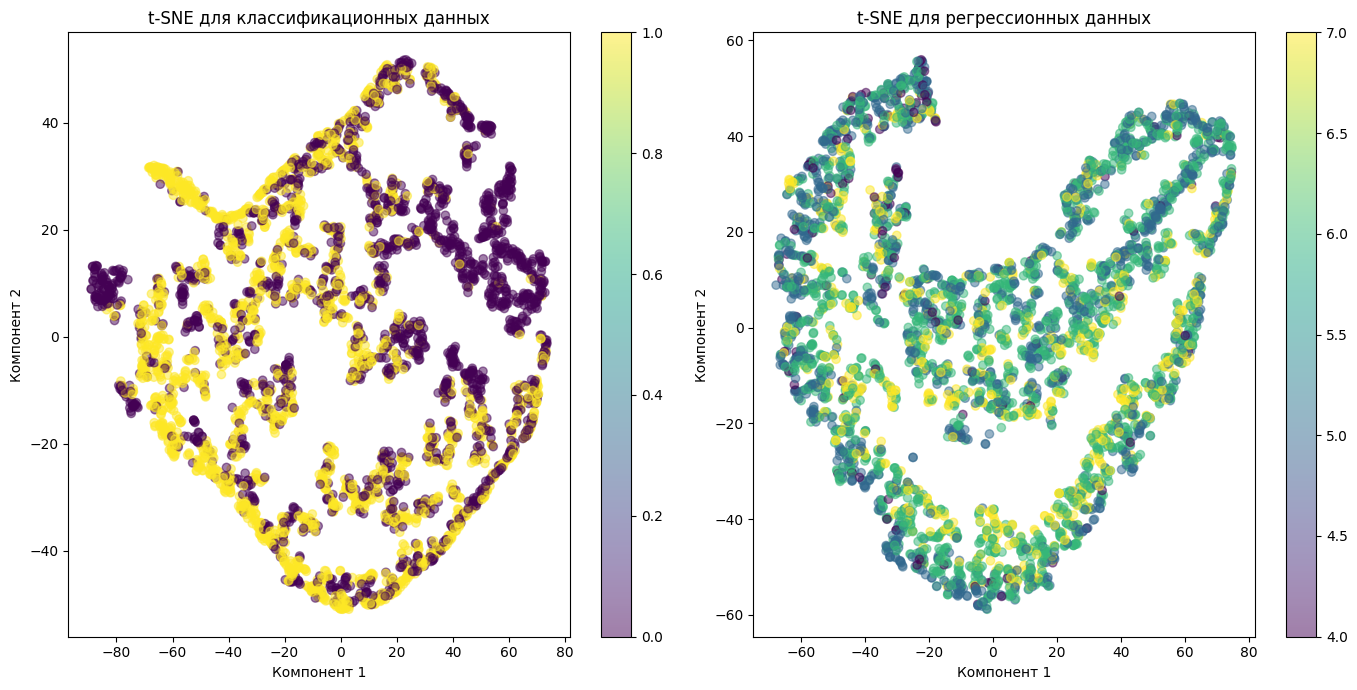

In [11]:
X_classification_sample = X_classification.sample(n=4000, random_state=42)
y_classification_sample = y_classification.loc[X_classification_sample.index]

X_regression_sample = X_regression.sample(n=4000, random_state=42)
y_regression_sample = y_regression.loc[X_regression_sample.index]

# Инициализация t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Применение t-SNE к образцам данных классификации
tsne_results_clf = tsne.fit_transform(X_classification_sample)

# Применение t-SNE к образцам данных регрессии
tsne_results_reg = tsne.fit_transform(X_regression_sample)

# Визуализация результатов t-SNE
plt.figure(figsize=(14, 7))

# Визуализация t-SNE для классификационных данных
plt.subplot(1, 2, 1)
plt.scatter(tsne_results_clf[:, 0], tsne_results_clf[:, 1], c=y_classification_sample, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('t-SNE для классификационных данных')
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')

# Визуализация t-SNE для регрессионных данных
plt.subplot(1, 2, 2)
plt.scatter(tsne_results_reg[:, 0], tsne_results_reg[:, 1], c=y_regression_sample, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title('t-SNE для регрессионных данных')
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')

plt.tight_layout()
plt.show()

Isomap

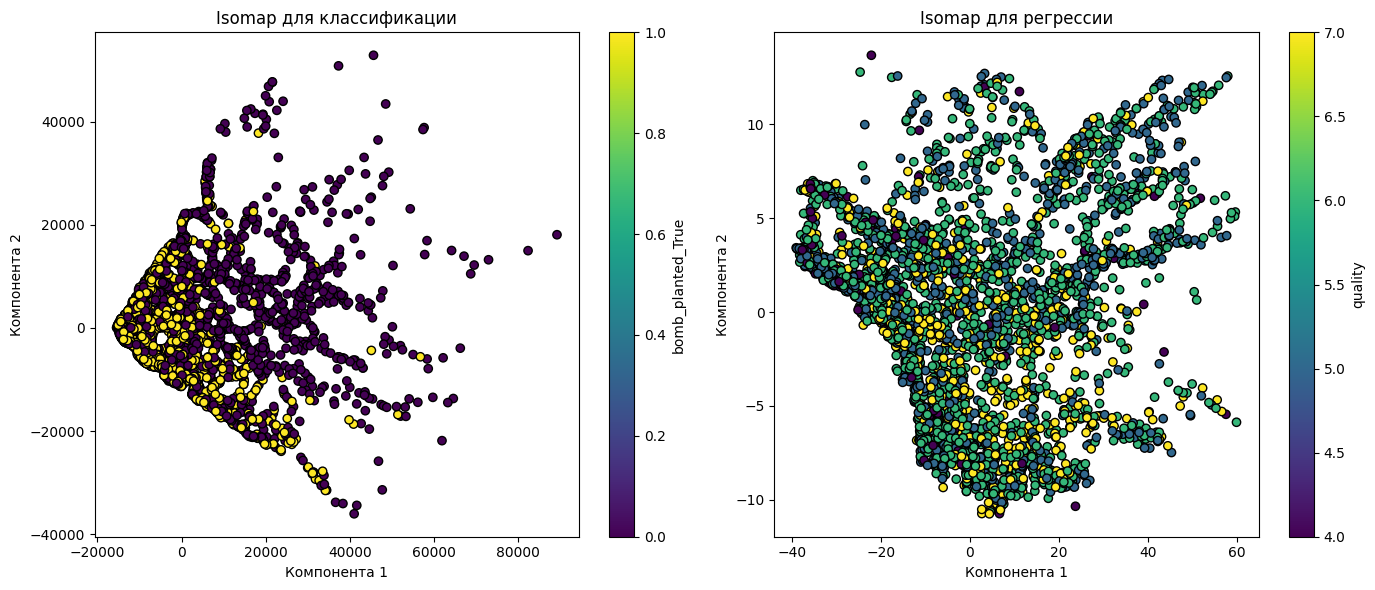

In [12]:
classification_test = classification_data.sample(n=4000, random_state=42)
regression_test = regression_data.sample(n=4000, random_state=42)

X_classification = classification_test.drop('bomb_planted_True', axis=1)
y_classification = classification_test['bomb_planted_True']

X_regression = regression_test.drop('quality', axis=1)
y_regression = regression_test['quality']

# Инициализация модели Isomap
isomap_clf = Isomap(n_components=2)
isomap_reg = Isomap(n_components=2)

# Применение Isomap к классификационным данным
X_isomap_clf = isomap_clf.fit_transform(X_classification)

# Применение Isomap к регрессионным данным
X_isomap_reg = isomap_reg.fit_transform(X_regression)

# Визуализация результатов Isomap
plt.figure(figsize=(14, 6))

# График для классификации
plt.subplot(1, 2, 1)
plt.scatter(X_isomap_clf[:, 0], X_isomap_clf[:, 1], c=y_classification, cmap='viridis', edgecolor='k')
plt.title('Isomap для классификации')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.colorbar(label='bomb_planted_True')

# График для регрессии
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_isomap_reg[:, 0], X_isomap_reg[:, 1], c=y_regression, cmap='viridis', edgecolor='k')
plt.title('Isomap для регрессии')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.colorbar(scatter, label='quality') 

plt.tight_layout()
plt.show()

3. Выберите две модели (одна - для регрессии и другая - для классификации). Обучите выбранные модели с использованием данных в пространстве низкой размерности - используйте результаты выполнения пункта 3 (не забудьте, что понижать нужно и X_train и X_test, но проще всего понижать X).

In [14]:
X_classification = classification_data.drop('bomb_planted_True', axis=1)
y_classification = classification_data['bomb_planted_True']

X_regression = regression_data.drop('quality', axis=1)
y_regression = regression_data['quality']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Применение PCA
pca_clf = PCA(n_components=2)
X_train_clf_pca = pca_clf.fit_transform(X_train_clf)
X_test_clf_pca = pca_clf.transform(X_test_clf)

pca_reg = PCA(n_components=2)
X_train_reg_pca = pca_reg.fit_transform(X_train_reg)
X_test_reg_pca = pca_reg.transform(X_test_reg)

# Обучение моделей
model_clf = LogisticRegression()
model_reg = LinearRegression()

model_clf.fit(X_train_clf_pca, y_train_clf)
model_reg.fit(X_train_reg_pca, y_train_reg)

# Оценка производительности моделей
y_pred_clf = model_clf.predict(X_test_clf_pca)
y_pred_reg = model_reg.predict(X_test_reg_pca)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
mse = r2_score(y_test_reg, y_pred_reg)

print("Точность классификации:", accuracy)
print("r2_score:", mse)

Точность классификации: 0.6800831443688586
r2_score: 0.0199102259739794


4. Сформулируйте вывод о том, какие методы понижения размерности лучше всего подходят для Ваших данных.

1. **Применение t-SNE** к классификационным данным эффективно выявило четкие кластеры, предположительно соответствующие различным классам. Это свидетельствует о хорошей разделимости классов в исходном пространстве признаков.

2. **Для регрессионных данных t-SNE** выявил интересные узоры, отражающие внутренние зависимости между значениями целевой переменной. Отсутствие четкого разделения на кластеры соответствует ожиданиям для задачи регрессии.

3. **Результаты PCA** на классификационных данных показывают некоторую структуру, однако кластеры менее выражены по сравнению с t-SNE.

4. **PCA на регрессионных данных** отображает данные в виде непрерывного спектра, что соответствует ожиданиям для регрессионных задач.

5. **Графики точности и R^2** показывают, что точность классификации ухудшается с увеличением числа признаков, что может свидетельствовать о переобучении или влиянии шумовых признаков. R^2 для регрессии стабилен, что указывает на сохранение основной информации при уменьшении числа признаков.

6. **Корреляционные матрицы** до и после отбора признаков демонстрируют изменения во взаимосвязях между признаками. После отбора признаков видны более ярко выраженные блоки в корреляционной матрице, что может предполагать более высокую предсказательную способность отобранных признаков.

Исходя из визуальных результатов, t-SNE представляется наилучшим выбором для визуализации классов в данных классификации. Однако окончательное решение о выборе метода следует принимать на основе кросс-валидации и других метрик производительности, а не только визуализации.